<a href="https://colab.research.google.com/github/PRAYFRME/CSE475/blob/main/Lab4_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tasks to do in the lab for the experiments:**
1. Data acquisition
2. Data Analysis:
a. Missing data check and replace
b. Filtering: row and column based on some criteria
c. Transformation: perform any suitable conversion on any column
d. component analysis: statistics actually
e. Visualization: show histograms, scatter plots
f. correlation analysis of the attributes from the data
g. principal component analysis (optional)
h. linear regression (optional)

In [1]:
#%% 1. Data acquisition

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('strange.csv')

**2**. Data Analysis:
a. Missing data check and replace
b. Filtering: row and column based on some criteria
c. Transformation: perform any suitable conversion on any column
d. component analysis: statistics actually
e. Visualization: show histograms, scatter plots
f. correlation analysis of the attributes from the data
g. principal component analysis (optional)
h. linear regression (optional)

In [2]:
#%% a. Missing data check
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

df.isnull().values.any()

Series([], dtype: int64)


False

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
#%% Filtering: row and column based on some criteria

#Summarize the dataset
print(df.keys())
print(df.describe())
df.info()

#Take a look at the first few rows
print(df.head())
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null 

In [4]:
print('Summary of gender:',df['gender'].describe())
print('Summary of race/ethnicity:',df['race/ethnicity'].describe())
print('Summary of parental level of education:',df['parental level of education'].describe())
print('Summary of lunch:',df['lunch'].describe())
print('Summary of test preparation course:',df['test preparation course'].describe())
print('Summary of math score:',df['math score'].describe())
print('Summary of reading score:',df['reading score'].describe())
print('Summary of writing score:',df['writing score'].describe())

Summary of gender: count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object
Summary of race/ethnicity: count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object
Summary of parental level of education: count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object
Summary of lunch: count         1000
unique           2
top       standard
freq           645
Name: lunch, dtype: object
Summary of test preparation course: count     1000
unique       2
top       none
freq       642
Name: test preparation course, dtype: object
Summary of math score: count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64
Summary of reading score: count    1000.000000
mean       69.169000
std        14.600192
mi

In [5]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'gender'. 
df['gender']= label_encoder.fit_transform(df['gender']) 
print(df.head())

   gender race/ethnicity  ... reading score writing score
0       0        group B  ...            72            74
1       0        group C  ...            90            88
2       0        group B  ...            95            93
3       1        group A  ...            57            44
4       1        group C  ...            78            75

[5 rows x 8 columns]


In [8]:
#%% MinMax Scaler

df_scaled = df.copy()
col_names = ['math score', 'reading score', 'writing score']
features = df_scaled[col_names]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(60, 65))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,63.60,63.313253,63.555556
1,0,group C,some college,standard,completed,63.45,64.397590,64.333333
2,0,group B,master's degree,standard,none,64.50,64.698795,64.611111
3,1,group A,associate's degree,free/reduced,none,62.35,62.409639,61.888889
4,1,group C,some college,standard,none,63.80,63.674699,63.611111
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,64.40,64.939759,64.722222
996,1,group C,high school,free/reduced,none,63.10,62.289157,62.500000
997,0,group C,high school,free/reduced,completed,62.95,63.253012,63.055556
998,0,group D,some college,standard,completed,63.40,63.674699,63.722222


In [9]:
print(df_scaled)

     gender race/ethnicity  ... reading score writing score
0         0        group B  ...     63.313253     63.555556
1         0        group C  ...     64.397590     64.333333
2         0        group B  ...     64.698795     64.611111
3         1        group A  ...     62.409639     61.888889
4         1        group C  ...     63.674699     63.611111
..      ...            ...  ...           ...           ...
995       0        group E  ...     64.939759     64.722222
996       1        group C  ...     62.289157     62.500000
997       0        group C  ...     63.253012     63.055556
998       0        group D  ...     63.674699     63.722222
999       0        group D  ...     64.156627     64.222222

[1000 rows x 8 columns]


In [10]:
#%% Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

df_scaled.describe()

,gender,math score,reading score,writing score
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.482000,9.303669e-17,2.096101e-16,-7.904788e-17
std,0.499926,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,0.000000,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,0.000000,-5.872457e-03,5.694554e-02,6.228578e-02
75%,1.000000,7.199368e-01,6.736842e-01,7.206978e-01
max,1.000000,2.237538e+00,2.112741e+00,2.103363e+00


In [11]:
#%% c. Transformation: perform any suitable conversion on any column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#from sklearn.preprocessing import ColumnTransformer, OneHotEncoder
transformer = ColumnTransformer(transformers=[('gender', OneHotEncoder(), [0])])
print(df.head())

   gender race/ethnicity  ... reading score writing score
0       0        group B  ...            72            74
1       0        group C  ...            90            88
2       0        group B  ...            95            93
3       1        group A  ...            57            44
4       1        group C  ...            78            75

[5 rows x 8 columns]


In [12]:
print(df[['math score', 'reading score', 'writing score','gender']].mean())

print(df[['math score', 'reading score', 'writing score', 'gender']].median())

print(df[['math score', 'reading score', 'writing score', 'gender']].std())

print(df[['math score', 'reading score', 'writing score', 'gender']].var())

math score       66.089
reading score    69.169
writing score    68.054
gender            0.482
dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
gender            0.0
dtype: float64
math score       15.163080
reading score    14.600192
writing score    15.195657
gender            0.499926
dtype: float64
math score       229.918998
reading score    213.165605
writing score    230.907992
gender             0.249926
dtype: float64


In [13]:
#%% d. component analysis: statistics actually
df1=df[['math score','reading score','writing score']]
print( "variety mean: ",df1.mean() )
print("variety median: ",df1.median())
print("1st quartile: ",df1.quantile(0.25) )
print("2nd quartile: ",df1.quantile(0.50) )
print("3rd quartile: ",df1.quantile(0.75))
print("variety standard daviance: ",df1.std() )
print("variety daviance: ",df1.var() )
print("variety max: ",df1.max() )
print("variety min: ",df1.min())
print("variety skew: ",df1.skew() )
print("variety curtosis: ",df1.kurt())

variety mean:  math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
variety median:  math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
1st quartile:  math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64
2nd quartile:  math score       66.0
reading score    70.0
writing score    69.0
Name: 0.5, dtype: float64
3rd quartile:  math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64
variety standard daviance:  math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64
variety daviance:  math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64
variety max:  math score       100
reading score    100
writing score    100
dtype: int64
variety min:  math score        0
reading score    17
writing score    10
dtype: int64
variety skew:  math score      -0.278935
reading score 

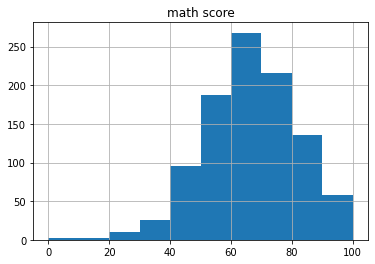

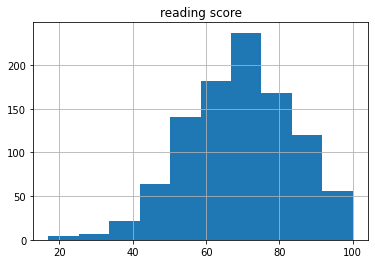

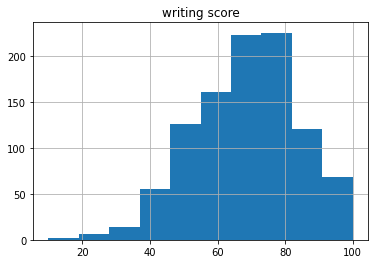

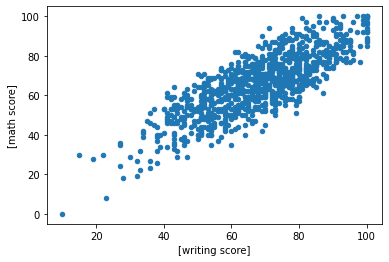

In [14]:
#%% e.Visualization: show histograms, scatter plots
df.hist(column = ['math score'])
df.hist(column = ['reading score'])
df.hist(column = ['writing score'])
df.plot.scatter(y=['math score'], x=['writing score'])
plt.show()

def lab04_Task3_2018_2_60_079():
    print(df.hist(column=['math score']))
    print(df.corr())
    print("Kurtusis:")
    kurtusis=df['math score'].kurtosis()
    skew=df['math score'].skew()
    print(kurtusis)
    print("Skewness:")
    print(skew)
    if skew < 0:
        print("Right Skew")
    elif skew == 0:
        print("Normal Distribution")
    else:
        print("Left Skew")
    if kurtusis>3:
        print("Leptokurtic")
    elif kurtusis<3:
        print("Platykurtic")
    else:
        print("Mesokurtic")
lab04_Task3_2018_2_60_079()

def lab04_Task3_2018_2_60_079():
    print(df.hist(column=['writing score']))
    print(df.corr())
    print("Kurtusis:")
    kurtusis=df['writing score'].kurtosis()
    skew=df['writing score'].skew()
    print(kurtusis)
    print("Skewness:")
    print(skew)
    if skew < 0:
        print("Right Skew")
    elif skew == 0:
        print("Normal Distribution")
    else:
        print("Left Skew")
    if kurtusis>3:
        print("Leptokurtic")
    elif kurtusis<3:
        print("Platykurtic")
    else:
        print("Mesokurtic")
lab04_Task3_2018_2_60_079()

def lab04_Task3_2018_2_60_079():
    print(df.hist(column=['reading score']))
    print(df.corr())
    print("Kurtusis:")
    kurtusis=df['reading score'].kurtosis()
    skew=df['reading score'].skew()
    print(kurtusis)
    print("Skewness:")
    print(skew)
    if skew < 0:
        print("Right Skew")
    elif skew == 0:
        print("Normal Distribution")
    else:
        print("Left Skew")
    if kurtusis>3:
        print("Leptokurtic")
    elif kurtusis<3:
        print("Platykurtic")
    else:
        print("Mesokurtic")
lab04_Task3_2018_2_60_079()

def lab04_Task3_2018_2_60_079():
    print(df.hist(column=['gender']))
    print(df.corr())
    print("Kurtusis:")
    kurtusis=df['gender'].kurtosis()
    skew=df['gender'].skew()
    print(kurtusis)
    print("Skewness:")
    print(skew)
    if skew < 0:
        print("Right Skew")
    elif skew == 0:
        print("Normal Distribution")
    else:
        print("Left Skew")
    if kurtusis>3:
        print("Leptokurtic")
    elif kurtusis<3:
        print("Platykurtic")
    else:
        print("Mesokurtic")
lab04_Task3_2018_2_60_079()

def lab04_Task6_2018_2_60_079():
    df1 = df.query('gender == 0')
    df2= df.query('gender == 1')

    total = len(df)
    check1 = len(df1)
    check2 = len(df2)

    print("Non-Fraudulent:",(check1/total*100))
    print("Fraudulent:",(check2/total*100))
lab04_Task6_2018_2_60_079()

def lab04_Task7_2018_2_60_079():
    df['math score'].value_counts().plot(kind='hist')
lab04_Task7_2018_2_60_079()

def lab04_Task7_2018_2_60_079():
    df['reading score'].value_counts().plot(kind='hist')
lab04_Task7_2018_2_60_079()

def lab04_Task7_2018_2_60_079():
    df['writing score'].value_counts().plot(kind='hist')
lab04_Task7_2018_2_60_079()

def lab04_Task8_2018_2_60_079():
    x1 = df.loc[df['gender']==0]
    y1 = df.loc[df['gender']==1]
    z = x1.size*100/df.size
    o = y1.size*100/df.size
    x2 = [1,2]
    y2 = [z,o]
    tick_label = ['zero', 'one']
    plt.bar(x2,y2,tick_label=tick_label,width= 0.4,color=['green','red'])
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.show()
lab04_Task8_2018_2_60_079()

def lab04_Task11_2018_2_60_079():
     df.plot.scatter(y=['math score'], x=['writing score'])
lab04_Task11_2018_2_60_079()

def lab04_Task10_2018_2_60_079():
    corr_matrix = df.corr().abs()
    x = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1)
    .astype(np.bool))
    to_drop = [column for column in x
    .columns if any(x[column] > 0.95)]
    df.drop(to_drop, axis = 1, inplace = True)
    print(x)
lab04_Task10_2018_2_60_079()

math_Q1=df[['math score']].quantile(0.25)
math_Q3=df[['math score']].quantile(0.75)
print(df[['math score']].quantile(0.25))
print(df[['math score']].mean())
print(df[['math score']].quantile(0.75))
print(math_Q3-math_Q1)


reading_Q1=df[['reading score']].quantile(0.25)
reading_Q3=df[['reading score']].quantile(0.75)
print(df[['reading score']].quantile(0.25))
print(df[['reading score']].mean())
print(df[['reading score']].quantile(0.75))
print(reading_Q3-reading_Q1)


writing_Q1=df[['writing score']].quantile(0.25)
writing_Q3=df[['writing score']].quantile(0.75)
print(df[['writing score']].quantile(0.25))
print(df[['writing score']].mean())
print(df[['writing score']].quantile(0.75))
print(writing_Q3-writing_Q1)

df.boxplot(column=['math score', 'reading score', 'writing score'])

In [15]:
#%% f.correlation analysis of the attributes from the data
corr_matrix = df.corr().abs()
x = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1)
.astype(np.bool))
to_drop = [column for column in x
.columns if any(x[column] > 0.95)]
df.drop(to_drop, axis = 1, inplace = True)
print(x)

               gender  math score  reading score  writing score
gender            NaN    0.167982       0.244313       0.301225
math score        NaN         NaN       0.817580       0.802642
reading score     NaN         NaN            NaN       0.954598
writing score     NaN         NaN            NaN            NaN


In [16]:
#%% g. principal component analysis (optional)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender']) 
print(df.head())

   gender race/ethnicity  ... math score reading score
0       0        group B  ...         72            72
1       0        group C  ...         69            90
2       0        group B  ...         90            95
3       1        group A  ...         47            57
4       1        group C  ...         76            78

[5 rows x 7 columns]


In [17]:
#%%
df['race/ethnicity']= label_encoder.fit_transform(df['race/ethnicity']) 
print(df.head())

   gender  race/ethnicity  ... math score reading score
0       0               1  ...         72            72
1       0               2  ...         69            90
2       0               1  ...         90            95
3       1               0  ...         47            57
4       1               2  ...         76            78

[5 rows x 7 columns]


In [18]:
#%%
df['parental level of education']= label_encoder.fit_transform(df['parental level of education']) 
print(df.head())

   gender  race/ethnicity  ...  math score reading score
0       0               1  ...          72            72
1       0               2  ...          69            90
2       0               1  ...          90            95
3       1               0  ...          47            57
4       1               2  ...          76            78

[5 rows x 7 columns]


In [19]:
#%%
df['lunch']= label_encoder.fit_transform(df['lunch']) 
print(df.head())

   gender  race/ethnicity  ...  math score  reading score
0       0               1  ...          72             72
1       0               2  ...          69             90
2       0               1  ...          90             95
3       1               0  ...          47             57
4       1               2  ...          76             78

[5 rows x 7 columns]


In [20]:
#%%
df['test preparation course']= label_encoder.fit_transform(df['test preparation course']) 
print(df.head())

   gender  race/ethnicity  ...  math score  reading score
0       0               1  ...          72             72
1       0               2  ...          69             90
2       0               1  ...          90             95
3       1               0  ...          47             57
4       1               2  ...          76             78

[5 rows x 7 columns]


In [21]:
#%%
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
new_pca=pca.transform(scaled_data)
scaled_data.shape
new_pca.shape
new_pca

array([[-0.30919167,  0.52239266],
       [-1.49036784,  1.26275846],
       [-1.94995288,  0.69924511],
       ...,
       [ 0.33438704,  1.68278564],
       [-1.13154243,  0.97439725],
       [-0.67897673,  1.14649307]])

In [22]:
#%%
principal_Df = pd.DataFrame(data = new_pca
             , columns = ['principal component 1', 'principal component 2'])
principal_Df

,principal component 1,principal component 2
0,-0.309192,0.522393
1,-1.490368,1.262758
2,-1.949953,0.699245
3,2.272096,-0.440363
4,-0.728128,-1.244779
...,...,...
995,-3.090531,1.007180
996,1.433105,-0.845393
997,0.334387,1.682786
998,-1.131542,0.974397


In [23]:
#%%
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.30316606 0.15925879]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000  

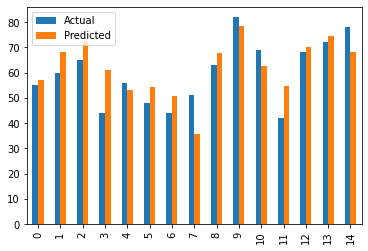

In [24]:
#%% h. linear regression (optional)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv('strange.csv')

df.head()
df.info()

print(df.describe())

print ('Number of rows: ', df.shape[0])
print ('Number of columns: ', df.shape[1])
x = df[['reading score', 'writing score']].values
y = df['math score'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
predicted = regressor.predict(x_test)
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
df2.head(25)
graph = df2.head(15)
graph.plot(kind='bar')


Group members/Contributors:

1. Md. Salem Talukder (2018-2-60-077)
2. Mehedi Hasan Tarek (2018-2-60-079)
3. Sinthia Sarkar Ananna.(2018-3-60-101)